In [ ]:
!git clone https://github.com/AlexeyAB/darknet

%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

!/usr/local/cuda/bin/nvcc --version
!make

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/datasets/
!cp /content/drive/MyDrive/datasets/obj.zip ../
!unzip ../obj.zip -d data/

In [ ]:
!cp /content/drive/MyDrive/datasets/obj.names ./data
!cp /content/drive/MyDrive/datasets/obj.data  ./data
!cp /content/drive/MyDrive/datasets/yolov4-obj.cfg  ./data
!cp /content/drive/MyDrive/datasets/train.txt  ./data
!cp /content/drive/MyDrive/datasets/test.txt  ./data

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
!cp /content/drive/MyDrive/datasets/backup/yolov4-obj_best.weights ./backup

In [ ]:
!./darknet detector train ./data/obj.data ./data/yolov4-obj.cfg ./backup/yolov4-obj_5000.weights -dont_show -map

In [ ]:
imShow('chart.png')

In [ ]:
# !cp /content/darknet/backup/yolov4-obj_last.weights /content/drive/MyDrive/datasets/backup/final
!cp /content/drive/MyDrive/datasets/backup/l3.png /content/

/content/darknet/cfg
sed: can't read yolov4-obj.cfg: No such file or directory
sed: can't read yolov4-obj.cfg: No such file or directory
/content/darknet
 CUDA-version: 11080 (12000), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv   

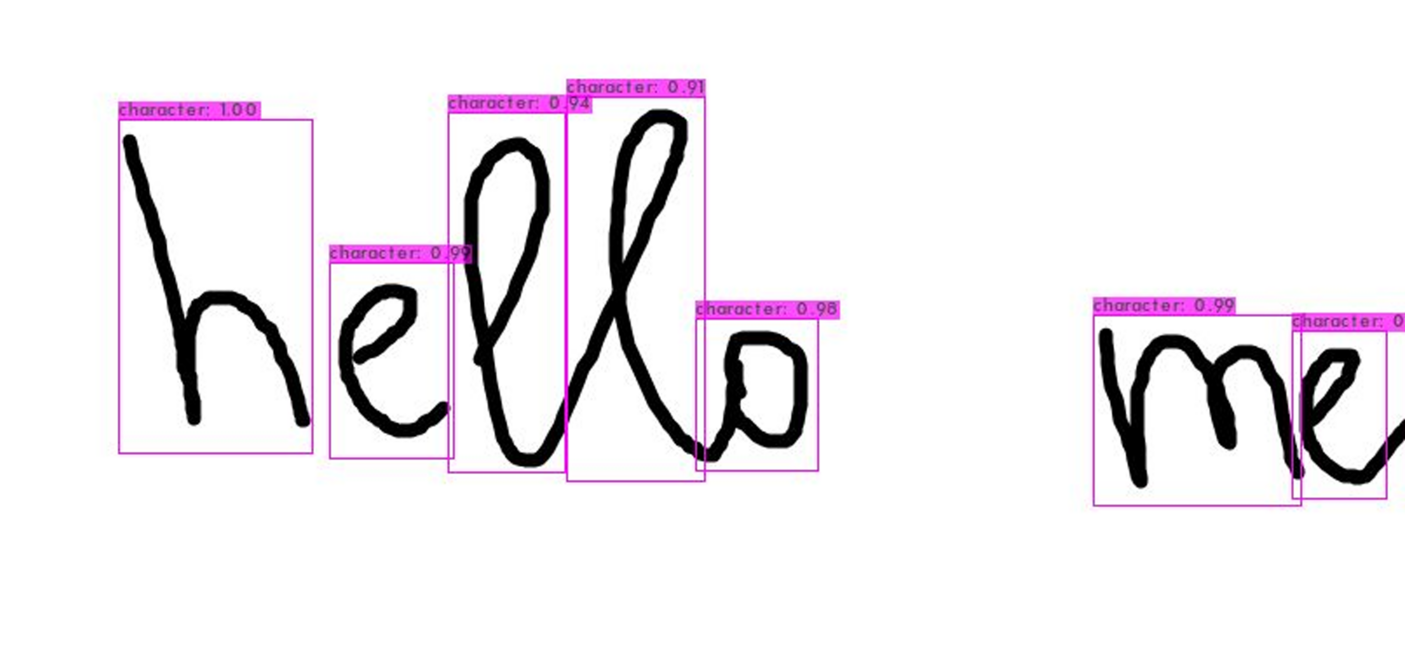

In [ ]:
# нужно перевести наш пользовательский cfg в тестовый режим
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

# запустите свой пользовательский детектор с помощью этой команды (загрузите изображение на свой Google диск для тестирования, флаг порога устанавливает точность, которой должно быть обнаружение, чтобы показать его)
!./darknet detector test ./data/obj.data ./data/yolov4-obj.cfg backup/yolov4-obj_best.weights /content/l3.png -thresh 0.5
imShow('predictions.jpg')